In [2]:
import os
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
path_blood = os.path.join('images', 'blood', 'data_red_only.csv')
path_good = os.path.join('images', 'good', 'data_good_red_only.csv')

df_blood = pd.read_csv(path_blood)
df_blood['label'] = 1
# print(df_blood)
df_good = pd.read_csv(path_good)
df_good['label'] = 0
df_data = pd.concat([df_blood, df_good], ignore_index=True)
df_features = df_data.loc[:, df_data.columns != 'label']
# print(df_data)
# print(df_features)

In [5]:
len(df_data[df_data['label'] == 0])

28

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_features.values, \
                                                    df_data['label'].values, test_size=0.33, random_state=42)
                                                    
print(X_train)


[[0.         0.         0.         ... 0.153625   0.30459615 0.174625  ]
 [0.         0.         0.         ... 0.10303557 0.07705542 0.14306452]
 [0.         0.         0.         ... 0.00819514 0.01359296 0.02812674]
 ...
 [0.         0.         0.         ... 0.         0.         0.03377578]
 [0.         0.         0.         ... 0.41689744 0.12097756 0.05480449]
 [0.         0.         0.         ... 0.14023629 0.26347679 0.12189451]]


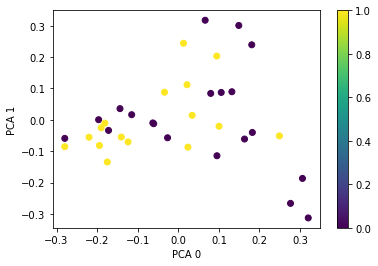

In [8]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_train)
plt.scatter(components[:, 0], components[:, 1], c = y_train)
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
# plt.legend()
plt.colorbar()
plt.show()
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)

In [9]:
clf = KNeighborsClassifier(n_neighbors=3).fit(pca_train, y_train)
y_hat = clf.predict(pca_test)
clf.score(pca_test, y_test)

0.7222222222222222

In [10]:
y_hat

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [11]:
accuracy_score(y_test, y_hat)

0.7222222222222222